In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [78]:
# Load dataset
file_path = 'D:\Tugas Akhir\Stroke\data_train.csv'
df = pd.read_csv(file_path)

# Pisahkan fitur dan target
X = df.drop('stroke', axis=1)
y = df['stroke']

In [79]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,0.1579,0,0,0,0,1,0,1,0.1477,0.5599,1,0,0,0,0
1,1,0.3509,0,0,0,0,0,1,0,0.1536,0.3719,0,0,1,0,0
2,1,0.4912,1,1,1,0,1,0,0,0.6513,0.2810,0,0,0,1,0
3,0,0.3158,0,0,0,1,0,0,0,0.1349,0.3864,0,0,0,1,0
4,1,0.9474,0,0,1,0,0,1,0,0.1067,0.4277,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,1,0.0175,0,0,1,0,1,0,1,0.0403,0.1302,0,0,1,0,0
2947,0,0.5088,0,0,1,0,1,0,1,0.2090,0.8037,0,1,0,0,0
2948,1,0.6491,0,0,1,0,1,0,0,0.7270,0.5062,0,0,1,0,0
2949,0,0.2982,0,0,1,0,1,0,1,0.2561,0.4360,0,1,0,0,0


In [80]:
# Hitung jumlah data untuk target stroke 0 dan 1
hitung_data = df['stroke'].value_counts()
# Cetak jumlah data untuk target stroke 0 dan 1
print(f'Jumlah data untuk target stroke 0: {hitung_data[0]}')
print(f'Jumlah data untuk target stroke 1: {hitung_data[1]}')

Jumlah data untuk target stroke 0: 2785
Jumlah data untuk target stroke 1: 166


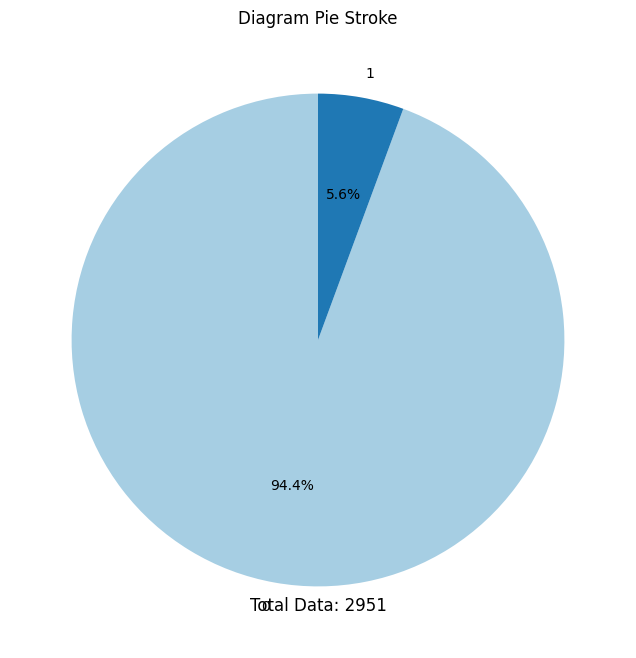

In [81]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df['stroke'].value_counts()

# Plotting diagram pie untuk kolom 'stroke'
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Tambahkan keterangan total data
total_data = len(df['stroke'])
plt.text(0, -1.1, f'Total Data: {total_data}', fontsize=12, ha='center')

# Berikan judul
plt.title('Diagram Pie Stroke')

# Tampilkan diagram
plt.show()

In [82]:
# Langkah 1: Pilih sampel minoritas
minority_class = X[y == 1]

# Tampilkan jumlah sampel minoritas
print("Jumlah Sampel Minoritas (Stroke=1):", len(minority_class))


Jumlah Sampel Minoritas (Stroke=1): 166


In [83]:
print(df.dtypes)

gender                              int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
work_type_Govt_job                  int64
work_type_Private                   int64
work_type_Self-employed             int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
smoking_status_Unknown              int64
smoking_status_formerly smoked      int64
smoking_status_never smoked         int64
smoking_status_smokes               int64
stroke                              int64
dtype: object


In [84]:
# # Langkah 2: Hitung Jarak
nn = NearestNeighbors(n_neighbors=2)
nn.fit(minority_class)
# distances, indices = nn.kneighbors(X)
# nn.fit(X[y == 1])
distances, indices = nn.kneighbors(X)
# Tampilkan hasil perhitungan jarak
print("Hasil Perhitungan Jarak:")
print("Distances:")
print(distances)
print("Indices:")
print(indices)


Hasil Perhitungan Jarak:
Distances:
[[1.09331736 1.32218828]
 [0.28624615 1.07911498]
 [1.1121938  1.14431231]
 ...
 [0.57028948 0.68927816]
 [0.48077971 0.50584727]
 [1.03501535 1.09828232]]
Indices:
[[135  42]
 [132  35]
 [136  85]
 ...
 [101  61]
 [ 72 160]
 [161  97]]


In [85]:
# Langkah 3: Hitung Rasio
ratio = len(X[y == 0]) / len(minority_class)
print("Rasio antara kelas mayoritas dan kelas minoritas:", ratio)


Rasio antara kelas mayoritas dan kelas minoritas: 16.77710843373494


In [87]:
# Langkah 4: Hitung Rasio ADASYN
desired_ratio = 0.4  # Set sesuai dengan target Anda (30-40%)
adasyn_ratio = min((desired_ratio / ratio, 1.0)) - 1.0  # Sesuaikan dengan rasio yang diinginkan
print("Jumlah Sampel Minoritas (setelah oversampling):", len(minority_class))
print("Desired Ratio (Rasio yang diinginkan):", desired_ratio)
print("ADASYN Ratio (Rasio yang digunakan untuk ADASYN):", adasyn_ratio)

Jumlah Sampel Minoritas (setelah oversampling): 166
Desired Ratio (Rasio yang diinginkan): 0.4
ADASYN Ratio (Rasio yang digunakan untuk ADASYN): -0.9761579892280072


In [88]:
# Langkah 5: Hitung Weight
weights = distances[:, 1] * (1 + adasyn_ratio)  # Sesuaikan dengan rasio yang diinginkan
print("Weight", weights)

Weight [0.03152363 0.02572827 0.02728271 ... 0.01643378 0.01206042 0.02618526]


In [89]:
# Langkah 6: Buat Sampel Sintetis (solusi alternatif)
synthetic_samples = []

for i in range(len(minority_class)):
    synthetic_sample = minority_class.values[i] + adasyn_ratio * (minority_class.values[indices[i, 1]] - minority_class.values[i])
    synthetic_samples.append(synthetic_sample)

adasyn_samples = pd.DataFrame(synthetic_samples, columns=minority_class.columns)
# Tampilkan hasil Sampel Sintetis (ADASYN)
print("Hasil Sampel Sintetis (ADASYN):")
print(adasyn_samples.head())

Hasil Sampel Sintetis (ADASYN):
     gender       age  hypertension  heart_disease  ever_married  \
0  1.000000  0.895217      1.976158       0.000000      1.000000   
1 -0.976158  1.239744     -0.976158       1.976158      1.976158   
2  1.976158  0.878356      1.000000      -0.976158     -0.976158   
3  1.976158  1.478332      1.976158       0.000000      0.000000   
4  1.976158  0.929800      0.000000       0.000000      1.000000   

   work_type_Govt_job  work_type_Private  work_type_Self-employed  \
0            0.000000          -0.976158                 1.976158   
1            1.976158           0.000000                -0.976158   
2            0.000000           1.000000                 0.000000   
3            1.000000           0.000000                 0.000000   
4            0.000000           1.976158                -0.976158   

   Residence_type  avg_glucose_level       bmi  smoking_status_Unknown  \
0       -0.976158           1.213475  0.514363               -0.976158

In [90]:
# Langkah 7: Gabungkan Sampel Sintetis dengan Dataset Asli
oversampled_data = pd.concat([X, adasyn_samples], axis=0)
oversampled_labels = pd.concat([y, pd.Series([1] * len(adasyn_samples))], axis=0)  # Tambahkan label untuk sampel sintetis

# Verifikasi jumlah sampel setelah oversampling
print("Jumlah Sampel Setelah Oversampling:", len(oversampled_data))

Jumlah Sampel Setelah Oversampling: 3117


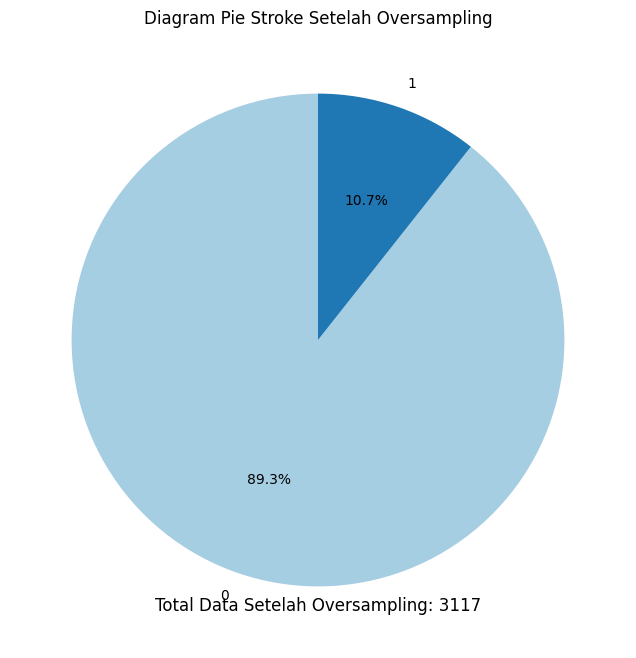

In [91]:
# Hitung frekuensi nilai unik dalam kolom 'stroke' setelah oversampling
oversampled_stroke_counts = oversampled_labels.value_counts()

# Plotting diagram pie untuk kolom 'stroke' setelah oversampling
plt.figure(figsize=(8, 8))
plt.pie(oversampled_stroke_counts, labels=oversampled_stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Tambahkan keterangan total data setelah oversampling
total_data_oversampled = len(oversampled_labels)
plt.text(0, -1.1, f'Total Data Setelah Oversampling: {total_data_oversampled}', fontsize=12, ha='center')

# Berikan judul
plt.title('Diagram Pie Stroke Setelah Oversampling')

# Tampilkan diagram setelah oversampling
plt.show()
